<a href="https://colab.research.google.com/github/Saunak-Bhattacharjee/Rad-Com/blob/main/Version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 97.2 MB/s eta 0:00:00


In [2]:
import os
import torch
import monai
from monai.apps import MedNISTDataset
from monai.data import DataLoader, Dataset
from monai.transforms import (
    Compose, LoadImageD, EnsureChannelFirstD,
    ScaleIntensityD, RandRotateD, RandFlipD, ToTensorD
)
from monai.utils import set_determinism
import matplotlib.pyplot as plt
import os

In [4]:
root_dir = "./data"
if not os.path.exists(root_dir):
    os.makedirs(root_dir)


In [5]:
dataset = MedNISTDataset(root_dir=root_dir, section="training", download=True, seed=42)
print(f"Total images: {len(dataset)}")

MedNIST.tar.gz: 59.0MB [00:02, 26.9MB/s]                            

2025-10-30 01:06:13,631 - INFO - Downloaded: data/MedNIST.tar.gz
2025-10-30 01:06:13,749 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2025-10-30 01:06:13,749 - INFO - Writing into directory: data.



Loading dataset: 100%|██████████| 47164/47164 [00:29<00:00, 1602.54it/s]

Total images: 47164


Batch shape: torch.Size([32, 1, 64, 64]), Labels: tensor([2, 5, 3, 4, 2])


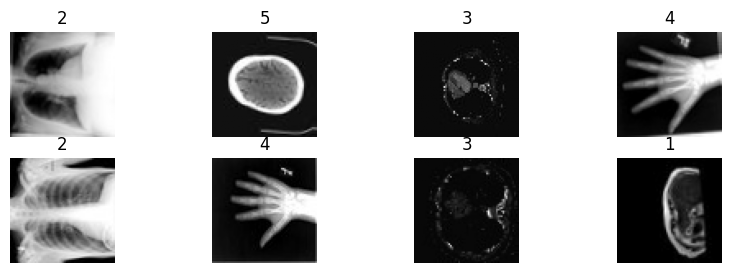

In [20]:
# Split the original dataset into subsets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_indices, val_indices, test_indices = torch.utils.data.random_split(
    range(len(dataset)), [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(42)
)

train_data = [dataset[i] for i in train_indices]
val_data = [dataset[i] for i in val_indices]

from monai.data import Dataset, DataLoader
from monai.transforms import Compose, EnsureChannelFirstD, ScaleIntensityD, RandRotateD, RandFlipD, ToTensorD

train_transforms = Compose([
    EnsureChannelFirstD(keys="image"),
    ScaleIntensityD(keys="image"),
    RandRotateD(keys="image", range_x=0.1, prob=0.5, keep_size=True),
    RandFlipD(keys="image", spatial_axis=0, prob=0.5),
    ToTensorD(keys="image"),
])

val_transforms = Compose([
    EnsureChannelFirstD(keys="image"),
    ScaleIntensityD(keys="image"),
    ToTensorD(keys="image"),
])

train_ds = Dataset(data=train_data, transform=train_transforms)
val_ds = Dataset(data=val_data, transform=val_transforms)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

batch = next(iter(train_loader))
images, labels = batch["image"], batch["label"]

print(f"Batch shape: {images.shape}, Labels: {labels[:5]}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i, 0].numpy(), cmap='gray')
    plt.title(int(labels[i]))
    plt.axis('off')
plt.show()
